# 1. Data Understanding

Pertama, import library apa saja yang dibutuhkan dalam analisis.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Selanjutnya, import file dataset yang berupa csv dalam python yang didefinisikan pada data `df`

In [ ]:
df = pd.read_csv('/content/smoker_dataset.csv')
df

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0
...,...,...,...,...,...,...,...
3903,37,male,yes,88,122.5/82.5,60.0,254.0
3904,49,male,yes,70,123/75,60.0,213.0
3905,56,male,yes,70,125/79,60.0,246.0
3906,50,male,yes,85,134/95,60.0,340.0


Selanjutnya akan ditinjau data perkolomnya dalam dataset

In [ ]:
df.columns

Index(['age', 'sex', 'current_smoker', 'heart_rate', 'blood_pressure',
       'cigs_per_day', 'chol'],
      dtype='object')

In [ ]:
df.shape

(3908, 7)

In [ ]:
df.size

27356

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3908 non-null   int64  
 1   sex             3908 non-null   object 
 2   current_smoker  3908 non-null   object 
 3   heart_rate      3908 non-null   int64  
 4   blood_pressure  3908 non-null   object 
 5   cigs_per_day    3894 non-null   float64
 6   chol            3882 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.8+ KB


Dari output di atas dapat dilihat tipe data perkolomnya

In [ ]:
df.describe()

,age,heart_rate,cigs_per_day,chol
count,3908.000000,3908.000000,3894.000000,3882.000000
mean,53.509212,75.335466,9.275552,236.708398
std,59.655865,13.053347,12.255640,44.381001
min,32.000000,-1.000000,0.000000,113.000000
25%,42.000000,67.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,1000.000000,143.000000,70.000000,696.000000


In [ ]:
df.describe(include='object')

,sex,current_smoker,blood_pressure
count,3908,3908,3908
unique,4,2,2317
top,female,no,130/80
freq,2076,1968,18


Selanjutnya dilihat apakah terdapat data yang hilang atau `null`

In [ ]:
df.isnull().sum()

age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol              26
dtype: int64

Dari output di atas dapat disimpulkan terdapat 14 data yang `null` pada data `cigs_per_day` dan terdapat 26 data yang `null` pada data `chol`

Selanjutnya kita cari apakah terdapat data yang duplikat atau data yang terduplikasi

In [ ]:
df.duplicated().sum()

8

Dapat disimpulan dari output bahwa terdapat sejumlah 8 data yang terduplikasi pada dataset ini

In [ ]:
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


Selanjutnya akan kita lihat sebaran outliers pada Dataset Smokers ini.

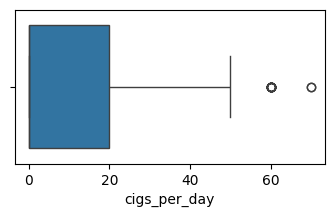

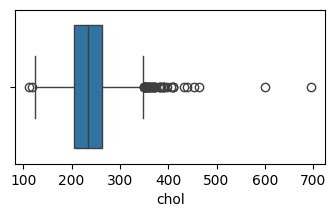

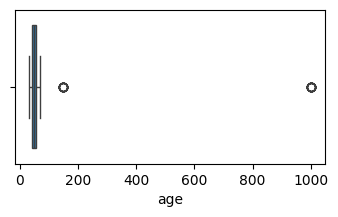

In [ ]:
for col in ['cigs_per_day', 'chol', 'age']:
  plt.figure(figsize=(4,2))
  sns.boxplot(x=df[col])
  plt.show()

Dari data dapat dilihat bahwa masih banyak outliers pada sebaran data sehingga perlu dilakukan penanganan lebih lanjut.

Selanjutnya di cek pada isian data yang terindikasi terdapat kekeliruan.

In [ ]:
df.age.unique()

array([  54,   45,   58,   42,   57,   43,   37,   49,   55,   39,   53,
         48,   46,   40,   56,   38,   65,   41,   44,   36,   64,   68,
         52,   60,   67,   35,   34,   51,   63,   62,   59,   61,   50,
         66,   47,   70,   69,  150,   33,   32, 1000])

In [ ]:
print(df.sex.unique())

['male' 'female' 'f' 'm']


In [ ]:
print(df.sex.unique())

['male' 'female' 'f' 'm']


In [ ]:
print(df.current_smoker.unique())

['yes' 'no']


In [ ]:
print(df.heart_rate.unique())

[ 95  64  81  90  62  75  66  65  93  70  85  58  83  80  60  72  71 105
  53  74  63  82  67  76  68  77  69  55  87  86  52  79 100  78  88  48
 104  92  84  50  94 120  98 122 101 110 107  96  73  56 103  57 106  61
 102  89 125  54  51  91 115  44  47  45 140 108  59 143   0  -1  46 112
  99 130  97]


In [ ]:
print(df.blood_pressure.unique())

['110/72' '121/72' '127.5/76' ... '153.5/105' '104/73.5' '134/95']


In [ ]:
print(df.cigs_per_day.unique())

[nan  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 23. 25. 29. 30. 35. 38. 40. 43. 45. 50. 60. 70.]


In [ ]:
print(df.chol.unique())

[219. 248. 235. 225. 226. 223. 222. 196. 188. 256. 214. 285. 276. 170.
 175. 240. 199. 300. 232. 167. 210. 207. 253. 149. 195. 169. 213. 192.
 200. 228. 212. 185. 204. 237. 181. 227. 270. 197. 168. 215. 187. 391.
 171. 249. 245. 202. 216. 193. 234. 230. 323. 290. 239. 203. 209. 314.
 273. 278. 217. 182. 159. 254. 312. 229. 220. 265. 186. 246. 251. 177.
 260. 258. 208. 282. 280. 183. 266. 311. 264. 301. 173. 283. 190. 176.
 261. 293. 250. 211. 244. 231. 238. 205. 298. 287. 247. 252. 366. 198.
 144. 305. 271. 179. 334. 201. 307. 178. 263. 304. 262. 281. 191. 257.
 289. 221. 206. 275. 333. 236. 165. 242. 172. 286. 160. 241. 277. 292.
 296. 180. 364. 274. 331. 320. 233. 332. 309. 306. 189. 156. 150. 279.
 224. 288. 268. 302. 243. 259. 297. 218.  nan 303. 155. 361. 336. 325.
 154. 294. 269. 310. 184. 267. 324. 126. 346. 295. 339. 272. 135. 330.
 163. 382. 255. 318. 340. 291. 164. 372. 350. 432. 161. 162. 194. 321.
 317. 327. 338. 352. 341. 328. 326. 308. 284. 152. 380. 299. 137. 329.
 344. 

In [ ]:
for col in ['age',	'sex',	'current_smoker',	'heart_rate',	'blood_pressure',	'cigs_per_day',	'chol']:
  print(df[col].unique())

[  54   45   58   42   57   43   37   49   55   39   53   48   46   40
   56   38   65   41   44   36   64   68   52   60   67   35   34   51
   63   62   59   61   50   66   47   70   69  150   33   32 1000]
['male' 'female' 'f' 'm']
['yes' 'no']
[ 95  64  81  90  62  75  66  65  93  70  85  58  83  80  60  72  71 105
  53  74  63  82  67  76  68  77  69  55  87  86  52  79 100  78  88  48
 104  92  84  50  94 120  98 122 101 110 107  96  73  56 103  57 106  61
 102  89 125  54  51  91 115  44  47  45 140 108  59 143   0  -1  46 112
  99 130  97]
['110/72' '121/72' '127.5/76' ... '153.5/105' '104/73.5' '134/95']
[nan  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 23. 25. 29. 30. 35. 38. 40. 43. 45. 50. 60. 70.]
[219. 248. 235. 225. 226. 223. 222. 196. 188. 256. 214. 285. 276. 170.
 175. 240. 199. 300. 232. 167. 210. 207. 253. 149. 195. 169. 213. 192.
 200. 228. 212. 185. 204. 237. 181. 227. 270. 197. 168. 215. 187. 391.
 171. 249. 245. 202. 216. 1

## Initial EDA

Pada tahap ini, akan dilakukan Initial EDA pada data yang belum dibersihkan dahulu.

Pertama kita cari jumlah orang yang diuji dalam analisis ini terhadap gendernya.

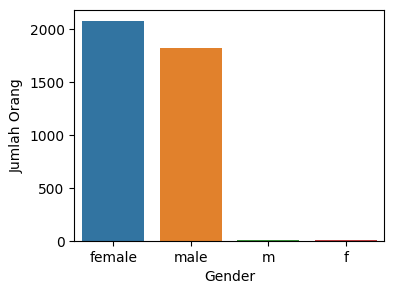

In [ ]:
# Jumlah subyek dataset
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(4, 3))
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index)

plt.xlabel('Gender')
plt.ylabel('Jumlah Orang')

plt.show()

In [ ]:
gender_counts = df['sex'].value_counts()
gender_counts

sex
female    2076
male      1820
m            7
f            5
Name: count, dtype: int64

Dari output di atas dapat dilihat jumlah orang terhadap jenis kelamin atau gendernya

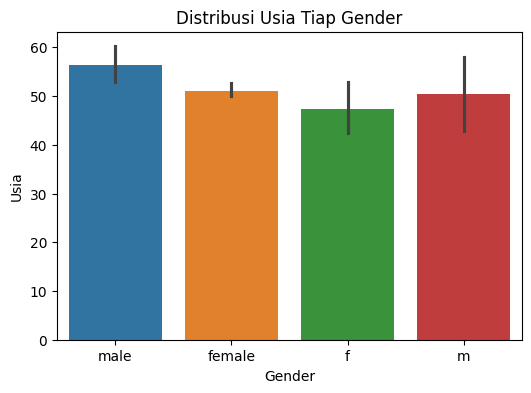

In [ ]:
# Rata-rata usia subyek

plt.figure(figsize=(6,4 ))
sns.barplot(x='sex', y='age', hue = 'sex' ,data=df)

plt.xlabel('Gender')
plt.ylabel('Usia')
plt.title('Distribusi Usia Tiap Gender')

plt.show()

# Rata-rata usia Male  => 56 tahun
# Rata-rata usia Female => 51 tahun
# Rata-rata usia f => 47 tahun
# Rata-rata usia m => 50 tahun

Selanjutnya dianalisis perbandingan jumlah konsumsi rokok perharinya terhadap gender

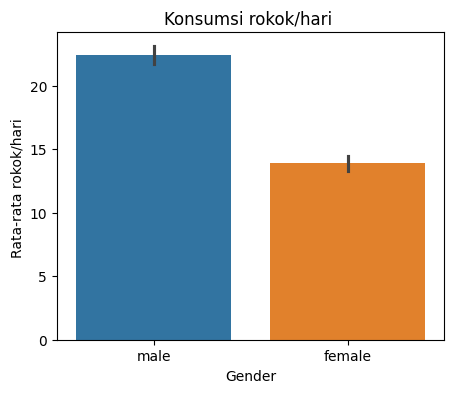

In [ ]:
filtered_df = df[df['current_smoker'] == 'yes']

# Plot
plt.figure(figsize=(5, 4))
sns.barplot(x='sex', y='cigs_per_day', hue='sex', data=filtered_df)

plt.xlabel('Gender')
plt.ylabel('Rata-rata rokok/hari ')
plt.title('Konsumsi rokok/hari ')

plt.show()

## Rata-rata konsumsi rokok Male => 22/hari
## Rata-rata konsumsi rokok Female => 14/hari

Selanjutnya dibandingkan dan divisualisasikan perbandingan kolesterol pria perokok dan pria non-perokok

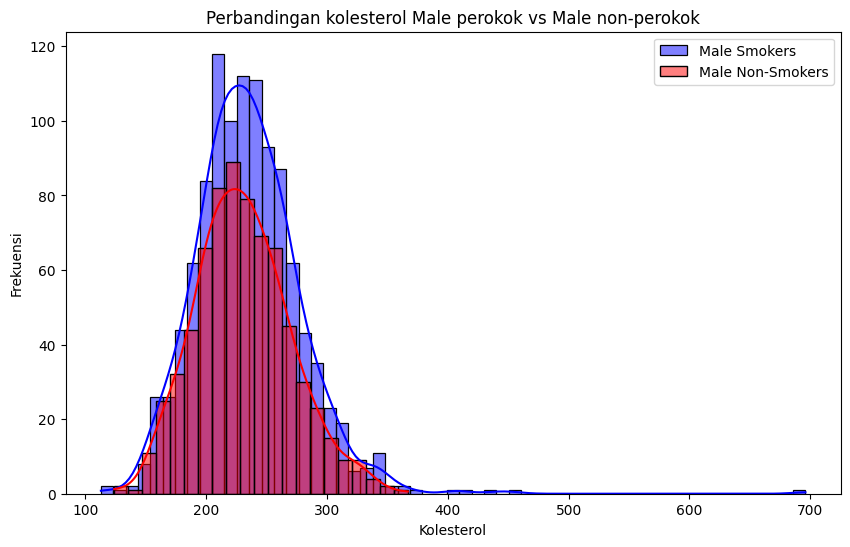

In [ ]:
male_smokers_df = df[(df['sex'] == 'male') & (df['current_smoker'] == 'yes')]

# Memfilter data untuk lelaki yang tidak merokok
male_non_smokers_df = df[(df['sex'] == 'male') & (df['current_smoker'] == 'no')]

# Plot histogram untuk tingkat kolesterol lelaki yang merokok dan tidak merokok
plt.figure(figsize=(10, 6))
sns.histplot(data=male_smokers_df, x='chol', color='blue', label='Male Smokers', kde=True, alpha=0.5)
sns.histplot(data=male_non_smokers_df, x='chol', color='red', label='Male Non-Smokers', kde=True, alpha=0.5)

plt.xlabel('Kolesterol')
plt.ylabel('Frekuensi')
plt.title('Perbandingan kolesterol Male perokok vs Male non-perokok')
plt.legend()

plt.show()

Selanjutnya dilakukan Tes Normalitas Shapiro-Wilk terhadap Male Smokers dan Male Non-Smokers.

In [ ]:
# Menggunakan tes normality Shapiro-Wilk
stat_smokers, p_smokers = stats.shapiro(male_smokers_df['chol'])
stat_non_smokers, p_non_smokers = stats.shapiro(male_non_smokers_df['chol'])

# Menampilkan hasil
print("Shapiro-Wilk Test for Male Smokers:")
print("Statistic:", stat_smokers)
print("p-value:", p_smokers)
print("Is normally distributed:", p_smokers > 0.05)

print("\nShapiro-Wilk Test for Male Non-Smokers:")
print("Statistic:", stat_non_smokers)
print("p-value:", p_non_smokers)
print("Is normally distributed:", p_non_smokers > 0.05)


Shapiro-Wilk Test for Male Smokers:
Statistic: nan
p-value: 1.0
Is normally distributed: True

Shapiro-Wilk Test for Male Non-Smokers:
Statistic: nan
p-value: 1.0
Is normally distributed: True


# 2. DATA PREPARATION

##Handling missing Values

In [ ]:
# Handling missing value cigs_per_day
# jika hasil skewness -0.5 < skewness < 0.5 -> normally distributed
#Distribusi tidak normal karena nilai skew lebih besar dari 0,5 sehingga missing value pada kolom cigs_per_day akan diisi dengan median

df['cigs_per_day'].skew()

1.2903488748302245

In [ ]:
# Mengisi null value dengan median

med = df['cigs_per_day'].median()
df['cigs_per_day'] = df['cigs_per_day'].fillna(med)

In [ ]:
#Handling missing value chol

df['chol'].skew()

0.8992783738829574

In [ ]:
# mengisi dengan median
#Distribusi tidak normal karena nilai skew lebih besar dari 0,5 sehingga missing value pada kolom chol akan diisi dengan median

med1 = df['chol'].median()
df['chol'] = df['chol'].fillna(med1)

In [ ]:
df.isna().sum()

age               0
sex               0
current_smoker    0
heart_rate        0
blood_pressure    0
cigs_per_day      0
chol              0
dtype: int64

### Handling duplicate Data

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

## Handling Inconsistent Data

In [ ]:
df['sex'].unique()

array(['male', 'female', 'f', 'm'], dtype=object)

In [ ]:
df['sex'] = df['sex'].replace({'f': 'female', 'm': 'male'})

In [ ]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

##Handling Outlier

In [ ]:
# Menghitung IQR untuk kolom 'age'
q3_age = df['age'].quantile(0.75)
q1_age = df['age'].quantile(0.25)
iqr_age = q3_age - q1_age

# Menghitung batas atas dan batas bawah untuk kolom 'age'
upper_bound_age = q3_age + 1.5 * iqr_age
lower_bound_age = q1_age - 1.5 * iqr_age

# Menghapus outlier dari kolom 'age'
df_nonoutliers_age = df[~((df['age'] > upper_bound_age) | (df['age'] < lower_bound_age))]

# Menghitung IQR untuk kolom 'cigs_per_day'
q3_cigs = df_nonoutliers_age['cigs_per_day'].quantile(0.75)
q1_cigs = df_nonoutliers_age['cigs_per_day'].quantile(0.25)
iqr_cigs = q3_cigs - q1_cigs

# Menghitung batas atas dan batas bawah untuk kolom 'cigs_per_day'
upper_bound_cigs = q3_cigs + 1.5 * iqr_cigs
lower_bound_cigs = q1_cigs - 1.5 * iqr_cigs

# Menghapus outlier dari kolom 'cigs_per_day'
df_nonoutliers_cigs = df_nonoutliers_age[~((df_nonoutliers_age['cigs_per_day'] > upper_bound_cigs) | (df_nonoutliers_age['cigs_per_day'] < lower_bound_cigs))]

# Menghitung IQR untuk kolom 'chol'
q3_chol = df_nonoutliers_cigs['chol'].quantile(0.75)
q1_chol = df_nonoutliers_cigs['chol'].quantile(0.25)
iqr_chol = q3_chol - q1_chol

# Menghitung batas atas dan batas bawah untuk kolom 'chol'
upper_bound_chol = q3_chol + 1.5 * iqr_chol
lower_bound_chol = q1_chol - 1.5 * iqr_chol

# Menghapus outlier dari kolom 'chol'
df_nonoutliers = df_nonoutliers_cigs[~((df_nonoutliers_cigs['chol'] > upper_bound_chol) | (df_nonoutliers_cigs['chol'] < lower_bound_chol))]

# Menghitung IQR untuk kolom 'heart_rate'
q3_hr = df_nonoutliers['heart_rate'].quantile(0.75)
q1_hr = df_nonoutliers['heart_rate'].quantile(0.25)
iqr_hr = q3_hr - q1_hr

# Menghitung batas atas dan batas bawah untuk kolom 'heart_rate'
upper_bound_hr = q3_hr + 1.5 * iqr_hr
lower_bound_hr = q1_hr - 1.5 * iqr_hr

# Menghapus outlier dari kolom 'heart_rate'
df_nonoutliers_final = df_nonoutliers[~((df_nonoutliers['heart_rate'] > upper_bound_hr) | (df_nonoutliers['heart_rate'] < lower_bound_hr))]

# Menampilkan bentuk DataFrame setelah penghapusan outlier
print(df_nonoutliers_final.shape)



(3720, 7)


In [ ]:
# kolom hear_rate (drop nilai yang tidak relevan)

# Mengganti nilai 0 dan -1 dengan NaN
df_nonoutliers['heart_rate'].replace({0: pd.NA, -1: pd.NA, 120: pd.NA, 140: pd.NA, 143: pd.NA, 122: pd.NA}, inplace=True)

# Menghapus baris yang memiliki nilai NaN di kolom 'heart_rate'
df_nonoutliers.dropna(subset=['heart_rate'], inplace=True)

<ipython-input-42-65daeddf7e01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonoutliers['heart_rate'].replace({0: pd.NA, -1: pd.NA, 120: pd.NA, 140: pd.NA, 143: pd.NA, 122: pd.NA}, inplace=True)
<ipython-input-42-65daeddf7e01>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonoutliers.dropna(subset=['heart_rate'], inplace=True)


In [ ]:
df_nonoutliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3785 entries, 0 to 3887
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3785 non-null   int64  
 1   sex             3785 non-null   object 
 2   current_smoker  3785 non-null   object 
 3   heart_rate      3785 non-null   object 
 4   blood_pressure  3785 non-null   object 
 5   cigs_per_day    3785 non-null   float64
 6   chol            3785 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 236.6+ KB


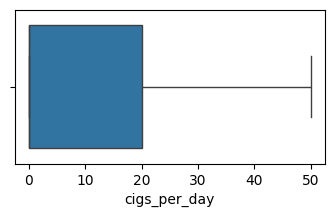

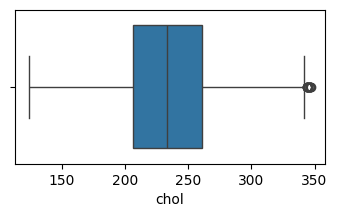

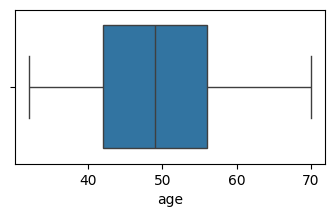

In [ ]:
for col in ['cigs_per_day', 'chol', 'age']:
  plt.figure(figsize=(4,2))
  sns.boxplot(x=df_nonoutliers_final[col])
  plt.show()

##Perbaiki tipe data kolom

In [ ]:
df_nonoutliers_final['cigs_per_day'] = df_nonoutliers_final['cigs_per_day'].astype('int')
df_nonoutliers_final['chol'] = df_nonoutliers_final['chol'].astype('int')

<ipython-input-45-69fe1169f48c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonoutliers_final['cigs_per_day'] = df_nonoutliers_final['cigs_per_day'].astype('int')
<ipython-input-45-69fe1169f48c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonoutliers_final['chol'] = df_nonoutliers_final['chol'].astype('int')


In [ ]:
df_nonoutliers_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3720 entries, 0 to 3887
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             3720 non-null   int64 
 1   sex             3720 non-null   object
 2   current_smoker  3720 non-null   object
 3   heart_rate      3720 non-null   int64 
 4   blood_pressure  3720 non-null   object
 5   cigs_per_day    3720 non-null   int64 
 6   chol            3720 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 232.5+ KB


# MODELING



## 1. Kecenderungan Merokok Berdasarkan Gender



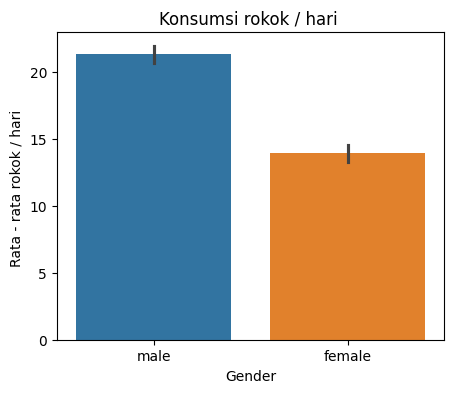

In [ ]:
filter = df_nonoutliers_final[df_nonoutliers_final['current_smoker'] == 'yes']

# Plot
plt.figure(figsize=(5, 4))
sns.barplot(x='sex', y='cigs_per_day', hue='sex', data=filter)

plt.xlabel('Gender')
plt.ylabel('Rata - rata rokok / hari ')
plt.title('Konsumsi rokok / hari ')

plt.show()

## rata - rata konsumsi rokok Male => 22 / hari
## rata - rata konsumsi rokok Female => 14 / hari

In [ ]:
#cek jumlah sampel

# Filter dengan current_smoker == 'yes'
filter = df_nonoutliers_final[df_nonoutliers['current_smoker'] == 'yes']

# Menghitung jumlah sampel masing-masing gender setelah filter
jumlah_per_gender = filter['sex'].value_counts()

print("Jumlah sampel masing-masing gender dengan current_smoker 'yes':")
print(jumlah_per_gender)


Jumlah sampel masing-masing gender dengan current_smoker 'yes':
sex
male      1052
female     790
Name: count, dtype: int64


<ipython-input-48-4d4a923f9fbe>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter = df_nonoutliers_final[df_nonoutliers['current_smoker'] == 'yes']


In [ ]:
#cek jumlah sampel

# Filter dengan current_smoker == 'yes'
filter = df_nonoutliers_final[df_nonoutliers_final['current_smoker'] == 'yes']

filter = df_nonoutliers_final[df_nonoutliers_final['current_smoker'] == 'no']

# Menghitung jumlah sampel masing-masing gender setelah filter
jumlah_per_gender = filter[df_nonoutliers_final['sex']=='female'].value_counts()

print("Jumlah sampel masing-masing gender dengan current_smoker 'yes':")
print(jumlah_per_gender)

Jumlah sampel masing-masing gender dengan current_smoker 'yes':
age  sex     current_smoker  heart_rate  blood_pressure  cigs_per_day  chol
33   female  no              86          108/67          0             158     1
56   female  no              80          119/82          0             344     1
                             79          101/71          0             280     1
                             78          114/71          0             267     1
                             75          190/97          0             338     1
                                                                              ..
47   female  no              75          118/84          0             228     1
                                         113.5/73        0             232     1
                                         107/77          0             266     1
                                         106/75          0             205     1
70   female  no              60          136/84   

<ipython-input-49-d00ba99d020f>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jumlah_per_gender = filter[df_nonoutliers_final['sex']=='female'].value_counts()


In [ ]:
# Mengelompokkan data berdasarkan gender dan menghitung rata-rata cigs_per_day
average_cigs_per_day = df_nonoutliers_final[df_nonoutliers['current_smoker'] == 'yes'].groupby('sex')['cigs_per_day'].mean()

# Cetak nilai rata-rata untuk tiap gender
print("Rata-rata cigs_per_day berdasarkan gender:")
print(average_cigs_per_day)


Rata-rata cigs_per_day berdasarkan gender:
sex
female    13.917722
male      21.304183
Name: cigs_per_day, dtype: float64


<ipython-input-50-86a01bda67a6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  average_cigs_per_day = df_nonoutliers_final[df_nonoutliers['current_smoker'] == 'yes'].groupby('sex')['cigs_per_day'].mean()


# 2. Kaitan Usia Perokok dengan Tingkat Kolesterolnya

In [ ]:

unique_values = sorted(df_nonoutliers_final['age'].unique())
print(unique_values)


[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]


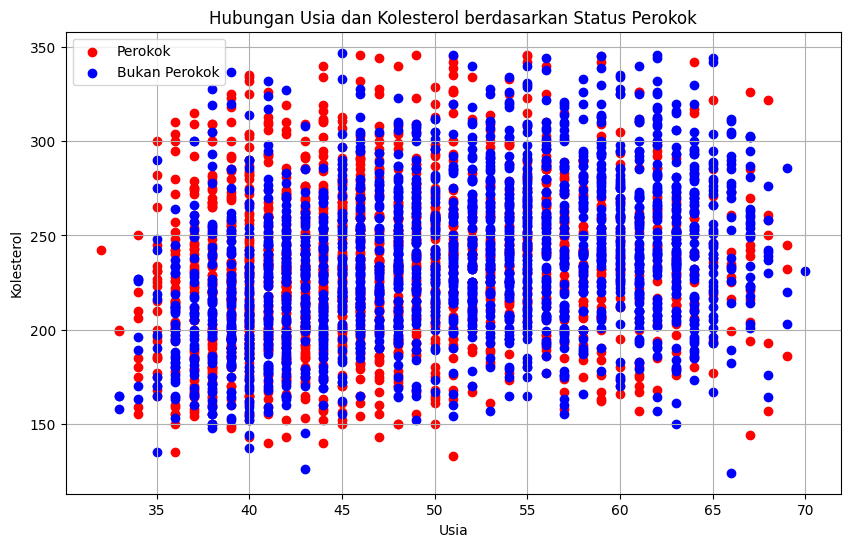

In [ ]:
# Memilih kolom yang relevan
df_cek = df_nonoutliers_final[['age', 'chol', 'current_smoker']]

# Mengurutkan data berdasarkan usia
df_cek_sorted = df_cek.sort_values(by='age')

# Memisahkan data berdasarkan status perokok
smoker = df_cek_sorted[df_cek_sorted['current_smoker'] == 'yes']
non_smoker = df_cek_sorted[df_cek_sorted['current_smoker'] == 'no']

# Menampilkan visualisasi
plt.figure(figsize=(10, 6))

# Scatter plot untuk perokok (merah)
plt.scatter(smoker['age'], smoker['chol'], color='red', marker='o', label='Perokok')

# Scatter plot untuk bukan perokok (biru)
plt.scatter(non_smoker['age'], non_smoker['chol'], color='blue', marker='o', label='Bukan Perokok')

plt.xlabel('Usia')
plt.ylabel('Kolesterol')
plt.title('Hubungan Usia dan Kolesterol berdasarkan Status Perokok')
plt.legend()
plt.grid(True)

# Menampilkan visualisasi
plt.show()



##Cek distribusi dan korelasi antara usia & kolesterol

In [ ]:
# berdistribusi normal
df_nonoutliers_final['age'].skew()

0.24572718129954738

In [ ]:
# berdistribusi normal
df_nonoutliers_final['chol'].skew()

0.22729138389985476

In [ ]:
# cek tingkat korelasi antara age dan chol
korelasi = df_nonoutliers_final['age'].corr(df_nonoutliers_final['chol'], method='pearson')

print("Korelasi Pearson antara age dan chol:", korelasi)

Korelasi Pearson antara age dan chol: 0.266065330300589


### jumlah usia sample diatas 50 tahun

In [ ]:
jumlah_usia_tua = df_nonoutliers_final[df_nonoutliers_final['age'] > 50]
hitung = jumlah_usia_tua['current_smoker'].value_counts()
print(hitung)


current_smoker
no     1011
yes     611
Name: count, dtype: int64


# 3. Perbedaan Kesehatan Antara Perokok dan Non-perokok

#### Perbedaan kesehatan perokok dan non-perokok berdasarkan kolesterol

###Male

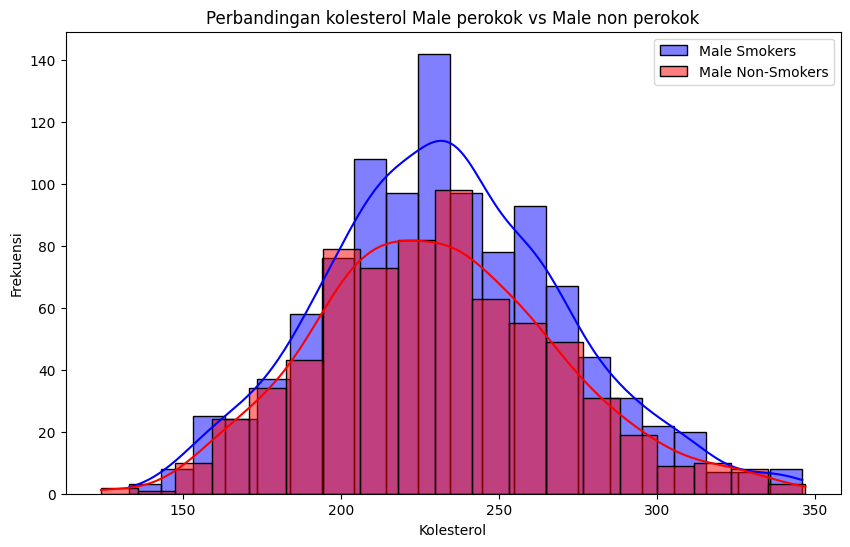

In [ ]:

male_smokers_df = df_nonoutliers_final[(df_nonoutliers_final['sex'] == 'male') & (df_nonoutliers_final['current_smoker'] == 'yes')]

# Memfilter data untuk lelaki yang tidak merokok
male_non_smokers_df = df_nonoutliers_final[(df_nonoutliers_final['sex'] == 'male') & (df_nonoutliers_final['current_smoker'] == 'no')]

# Plot histogram untuk tingkat kolesterol lelaki yang merokok dan tidak merokok
plt.figure(figsize=(10, 6))
sns.histplot(data=male_smokers_df, x='chol', color='blue', label='Male Smokers', kde=True, alpha=0.5)
sns.histplot(data=male_non_smokers_df, x='chol', color='red', label='Male Non-Smokers', kde=True, alpha=0.5)

plt.xlabel('Kolesterol')
plt.ylabel('Frekuensi')
plt.title('Perbandingan kolesterol Male perokok vs Male non perokok')
plt.legend()


In [ ]:

# Menghitung jumlah male dengan status perokok
jumlah_male_perokok = df_nonoutliers_final[(df_nonoutliers_final['sex'] == 'male') & (df_nonoutliers_final['current_smoker'] == 'yes')].shape[0]

# Menghitung jumlah male tanpa status perokok
jumlah_male_non_perokok = df_nonoutliers_final[(df_nonoutliers_final['sex'] == 'male') & (df_nonoutliers_final['current_smoker'] == 'no')].shape[0]

print("Jumlah female dengan status perokok:", jumlah_male_perokok)
print("Jumlah female tanpa status perokok:", jumlah_male_non_perokok)

Jumlah female dengan status perokok: 1052
Jumlah female tanpa status perokok: 693


###Female

<ipython-input-59-211b5ab2a8ca>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_non_smokers_df = df_nonoutliers_final[(df['sex'] == 'female') & (df_nonoutliers_final['current_smoker'] == 'no')]


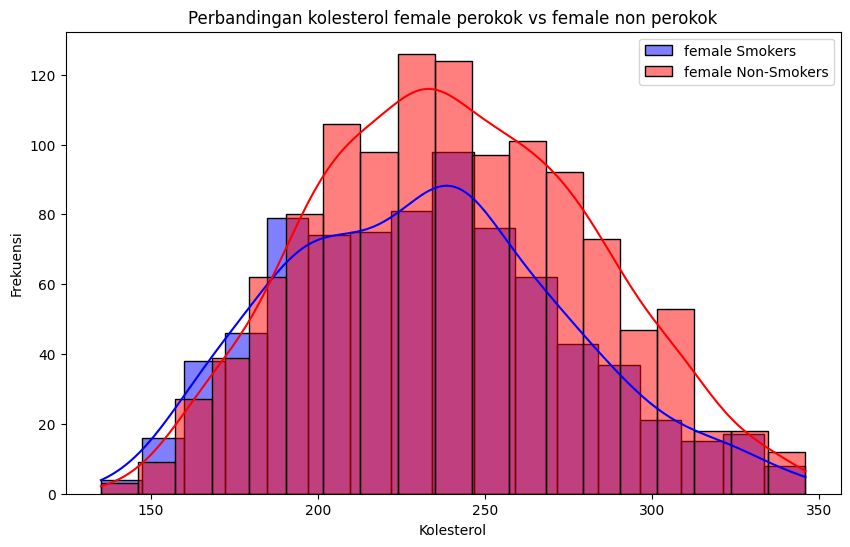

In [ ]:

female_smokers_df = df_nonoutliers_final[(df_nonoutliers_final['sex'] == 'female') & (df_nonoutliers_final['current_smoker'] == 'yes')]

# Memfilter data untuk lelaki yang tidak merokok
female_non_smokers_df = df_nonoutliers_final[(df['sex'] == 'female') & (df_nonoutliers_final['current_smoker'] == 'no')]

# Plot histogram untuk tingkat kolesterol lelaki yang merokok dan tidak merokok
plt.figure(figsize=(10, 6))
sns.histplot(data=female_smokers_df, x='chol', color='blue', label='female Smokers', kde=True, alpha=0.5)
sns.histplot(data=female_non_smokers_df, x='chol', color='red', label='female Non-Smokers', kde=True, alpha=0.5)

plt.xlabel('Kolesterol')
plt.ylabel('Frekuensi')
plt.title('Perbandingan kolesterol female perokok vs female non perokok')
plt.legend()


In [ ]:

# Menghitung jumlah female dengan status perokok
jumlah_female_perokok = df_nonoutliers_final[(df_nonoutliers_final['sex'] == 'female') & (df_nonoutliers_final['current_smoker'] == 'yes')].shape[0]

# Menghitung jumlah female tanpa status perokok
jumlah_female_non_perokok = df_nonoutliers_final[(df_nonoutliers_final['sex'] == 'female') & (df_nonoutliers_final['current_smoker'] == 'no')].shape[0]

print("Jumlah female dengan status perokok:", jumlah_female_perokok)
print("Jumlah female tanpa status perokok:", jumlah_female_non_perokok)


Jumlah female dengan status perokok: 790
Jumlah female tanpa status perokok: 1185


##Detak Jantung

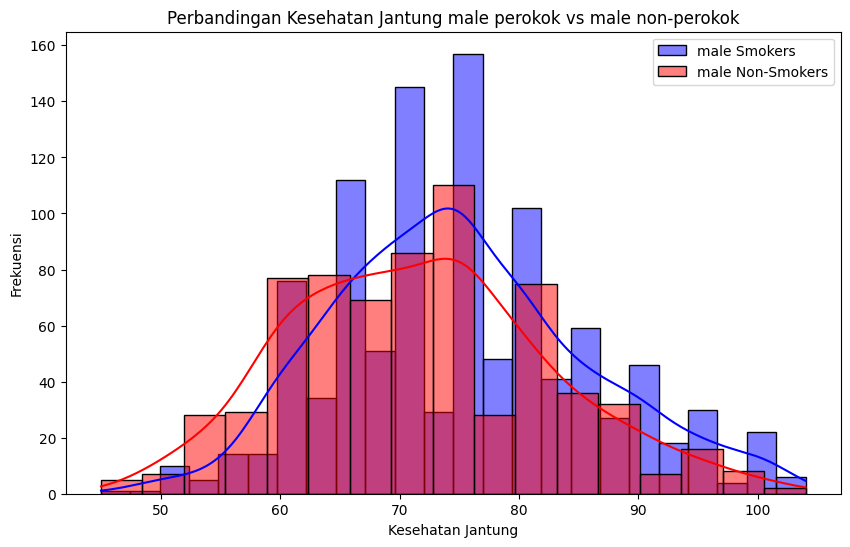

In [ ]:
male_smokers_df = df_nonoutliers_final[(df_nonoutliers_final['sex'] == 'male') & (df_nonoutliers_final['current_smoker'] == 'yes')]

male_non_smokers_df = df_nonoutliers_final[(df_nonoutliers_final['sex'] == 'male') & (df_nonoutliers_final['current_smoker'] == 'no')]

plt.figure(figsize=(10, 6))
sns.histplot(data=male_smokers_df, x='heart_rate', color='blue', label='male Smokers', kde=True, alpha=0.5)
sns.histplot(data=male_non_smokers_df, x='heart_rate', color='red', label='male Non-Smokers', kde=True, alpha=0.5)

plt.xlabel('Kesehatan Jantung')
plt.ylabel('Frekuensi')
plt.title('Perbandingan Kesehatan Jantung male perokok vs male non-perokok')
plt.legend()

female_smokers_df = df_nonoutliers_final[(df_nonoutliers_final['sex'] == 'female') & (df_nonoutliers_final['current_smoker'] == 'yes')]

female_non_smokers_df = df_nonoutliers_final[(df_nonoutliers_final['sex'] == 'female') & (df_nonoutliers_final['current_smoker'] == 'no')]

plt.figure(figsize=(6, 4))
sns.histplot(data=female_smokers_df, x='heart_rate', color='blue', label='female Smokers', kde=True, alpha=0.5)
sns.histplot(data=female_non_smokers_df, x='heart_rate', color='red', label='female Non-Smokers', kde=True, alpha=0.5)

plt.xlabel('Kesehatan Jantung')
plt.ylabel('Frekuensi')
plt.title('Perbandingan Kesehatan Jantung female perokok vs female non-perokok')
plt.legend()

In [ ]:
df_nonoutliers_final['heart_rate'].skew()

0.2584767471351791

In [ ]:
df_nonoutliers_final['heart_rate'].unique()

array([ 95,  64,  81,  90,  62,  75,  66,  65,  93,  70,  85,  58,  83,
        80,  60,  72,  71,  53,  74,  63,  82,  67,  76,  68,  77,  69,
        55,  87,  86,  52,  79, 100,  78,  88,  48, 104,  92,  84,  50,
        94,  98, 101,  96,  73,  56, 103,  57,  61, 102,  89,  54,  51,
        91,  47,  45,  59,  46,  99,  97])

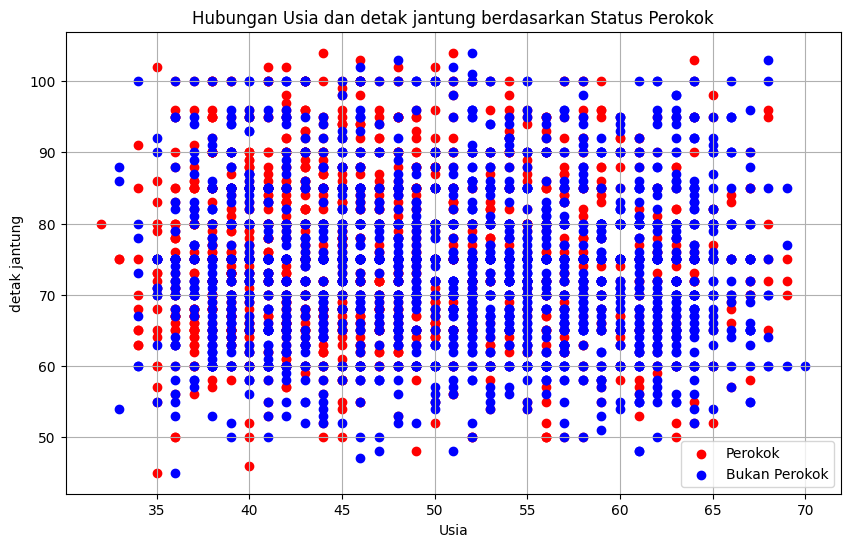

In [ ]:
# Memilih kolom yang relevan
df_cek = df_nonoutliers_final[['age', 'heart_rate', 'current_smoker']]

# Mengurutkan data berdasarkan usia
df_cek_sorted = df_cek.sort_values(by='age')

# Memisahkan data berdasarkan status perokok
smoker = df_cek_sorted[df_cek_sorted['current_smoker'] == 'yes']
non_smoker = df_cek_sorted[df_cek_sorted['current_smoker'] == 'no']

# Menampilkan visualisasi
plt.figure(figsize=(10, 6))

# Scatter plot untuk perokok (merah)
plt.scatter(smoker['age'], smoker['heart_rate'], color='red', marker='o', label='Perokok')

# Scatter plot untuk bukan perokok (biru)
plt.scatter(non_smoker['age'], non_smoker['heart_rate'], color='blue', marker='o', label='Bukan Perokok')

plt.xlabel('Usia')
plt.ylabel('detak jantung')
plt.title('Hubungan Usia dan detak jantung berdasarkan Status Perokok')
plt.legend()
plt.grid(True)

# Menampilkan visualisasi
plt.show()



In [ ]:
df_nonoutliers_final['heart_rate'].skew()

0.2584767471351791

In [ ]:
df_nonoutliers_final['age'].skew()

0.24572718129954738

In [ ]:
# cek tingkat korelasi antara age dan heart_rate
korelasi = df_nonoutliers_final['age'].corr(df_nonoutliers_final['heart_rate'], method='pearson')

print("Korelasi Pearson antara age dan heart_rate:", korelasi)

Korelasi Pearson antara age dan heart_rate: -0.018946131688873675
